# Hack Western - COVID Cough

In [68]:
import numpy as np
import pandas as pd
import os
import csv
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore")
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import pickle
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,array_to_img
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import librosa
import librosa.display

from keras import models
from keras import layers


__Make columns for dataset__

In [69]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

__Make empty CSV__

In [70]:
with open('data_extended.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(header)

In [ ]:
dataset = pd.read_csv("s3://isfan-bstn-1/dataset/archive/cough_trial_extended.csv")

__From Archive folder (Kaggle #1)__

In [ ]:
tot_rows = dataset.shape[0]
for i in range(tot_rows):
        source = dataset['file_properties'][i]
        class_name = dataset['class'][i]
        file_name = 'dataset/archive/trial_covid/'+source
        if os.path.exists(file_name):
            y,sr = librosa.load(file_name, mono=True, duration=5)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            df_row = list(np.array([source, np.mean(chroma_stft),np.mean(rmse), np.mean(spec_cent),  np.mean(spec_bw), np.mean(rolloff) , np.mean(zcr)])) + list(np.array([[np.mean(e)] for e in mfcc]).flatten()) + list(np.array([class_name]))

            #Export to CSV
            with open('data_extended.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(df_row)


__From virufy-data-main folder__

In [ ]:
dir = "s3://isfan-bstn-1/dataset/virufy-data-main/virufy-data-main/clinical/original"

In [ ]:
for col in enumerate(os.listdir(dir)):
    for file in range(len([f for f in os.listdir(dir + '/' + col[1])if os.path.isfile(os.path.join(dir + '/' + col[1], f))])):
        filename = dir + '/' + col[1] + '/' + os.listdir(dir + '/' + col[1])[file]
        print(os.listdir(dir + '/' + col[1])[file])
        source = os.listdir(dir + '/' + col[1])[file]
        class_name = col[1]
        file= os.path.splitext(os.listdir(dir + '/' + col[1])[file])[0]
        if filename.endswith("*.mp3"):
            sound = AudioSegment.from_mp3(filename)
            sound.export(os.path.splitext(filename)[0]+'.wav', format="wav")
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            df_row = list(np.array([source, np.mean(chroma_stft),np.mean(rmse), np.mean(spec_cent),  np.mean(spec_bw), np.mean(rolloff) , np.mean(zcr)])) + list(np.array([[np.mean(e)] for e in mfcc]).flatten()) + list(np.array([class_name]))

            #Export to CSV
            with open('data_extended.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(df_row)
            
        else:
            y,sr = librosa.load(filename, mono=True, duration=5)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            df_row = list(np.array([source, np.mean(chroma_stft),np.mean(rmse), np.mean(spec_cent),  np.mean(spec_bw), np.mean(rolloff) , np.mean(zcr)])) + list(np.array([[np.mean(e)] for e in mfcc]).flatten()) + list(np.array([class_name]))

            #Export to CSV
            with open('data_extended.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(df_row)
        

__From archive2 folder (Kaggle2)__

In [ ]:
dataset2 = pd.read_csv("s3://isfan-bstn-1/dataset/archive2/metadata_compiled.csv")

In [ ]:
dataset2 = dataset2[['uuid','status']]

In [ ]:
dataset2['status'].unique()

In [ ]:
dataset2 = dataset2[(dataset2["status"] == 'COVID-19') | (dataset2["status"] == 'healthy')]

In [ ]:
dataset2['status'].value_counts()

In [ ]:
dataset2_covid = dataset2[(dataset2["status"] == 'COVID-19')].sample(1155)
dataset2_healthy = dataset2[(dataset2["status"] == 'healthy')].sample(1000)
dataset2 = dataset2_covid.append(dataset2_healthy)

In [ ]:
dataset2 = dataset2.reset_index(drop=True)

In [ ]:
tot_rows = dataset2.shape[0]
for i in range(tot_rows):
    source = dataset2['uuid'][i]
    filename = 'dataset/archive2/'+source+'.webm'
    if os.path.exists(filename):
        print(i)
        print(filename)
        class_name = dataset2['status'][i]
        y,sr = librosa.load(filename, mono=True, duration=5)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        df_row = list(np.array([source, np.mean(chroma_stft),np.mean(rmse), np.mean(spec_cent),  np.mean(spec_bw), np.mean(rolloff) , np.mean(zcr)])) + list(np.array([[np.mean(e)] for e in mfcc]).flatten()) + list(np.array([class_name]))

        #Export to CSV
        with open('data_extended.csv', mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(df_row)
    else:
        print('fail')
        


---

In [48]:
dataframe = pd.read_csv('data_extended.csv')

In [49]:
dataframe = dataframe.drop(['filename'],axis=1)

In [ ]:
dataframe['label'].unique()

In [17]:
dataframe.loc[dataframe['label'] == 'COVID-19', 'label']  = 'covid'

In [ ]:
dataframe.loc[dataframe['label'] == 'healthy', 'label']  = 'not_covid'

In [ ]:
dataframe.loc[dataframe['label'] == 'covid', 'label']  = '1'
dataframe.loc[dataframe['label'] == 'not_covid', 'label']  = '0'

In [ ]:
dataframe.rename({'label': 'COVID'}, axis=1, inplace=True)

---

In [53]:
y = dataframe['COVID']

In [54]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(dataframe.iloc[:, :-1], dtype = float))

In [55]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

__MODELING__

In [56]:
from sklearn.pipeline import make_pipeline 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
pipelines = {
    'lr':make_pipeline(LogisticRegression()),
    'rc':make_pipeline(RidgeClassifier()),
    'svc':make_pipeline(SVC()),
    'xgb':make_pipeline( XGBClassifier()),
    'rf':make_pipeline(RandomForestClassifier()),
    'gb':make_pipeline(GradientBoostingClassifier())
}

In [57]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

[06:47:16] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
fit_models

{'lr': Pipeline(memory=None,
          steps=[('logisticregression',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False),
 'rc': Pipeline(memory=None,
          steps=[('ridgeclassifier',
                  RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                  fit_intercept=True, max_iter=None,
                                  normalize=False, random_state=None,
                                  solver='auto', tol=0.001))],
          verbose=False),
 'svc': Pipeline(memory=None,
          s

In [59]:
#making a function that did everything above
def fit_predict(model,X_test, y_test):
    y_pred=model.predict(X_test)
    print("Model name: " + type(model.steps[0][0]).__name__ )
    print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
    print("classification report\n")
    print(classification_report(y_test,y_pred))
    print("\n")
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=fit_models['gb'].classes_).plot(cmap='viridis')
    #plt.title(f'Confusion matrix of {model} model on test data')
    plt.show()

Model name: str
Accuracy score: 0.5631067961165048
classification report

              precision    recall  f1-score   support

           0       0.51      0.48      0.49       185
           1       0.60      0.63      0.62       227

    accuracy                           0.56       412
   macro avg       0.56      0.56      0.55       412
weighted avg       0.56      0.56      0.56       412





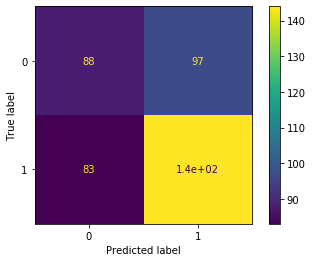

In [60]:
fit_predict(fit_models['xgb'], X_test, y_test)

In [62]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],))) 

model.add(layers.Dense(256, activation='relu'))

model.add(Dropout(0.2))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(Dropout(0.2))

model.add(layers.Dense(10, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))
    
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               13824     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [63]:
batch_size = 16




history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=batch_size)

Epoch 1/100
103/103 [==============================] - 2s 6ms/step - loss: 0.6962 - accuracy: 0.5292
Epoch 2/100
103/103 [==============================] - 1s 6ms/step - loss: 0.6773 - accuracy: 0.5662
Epoch 3/100
103/103 [==============================] - 1s 6ms/step - loss: 0.6727 - accuracy: 0.5899
Epoch 4/100
103/103 [==============================] - 1s 7ms/step - loss: 0.6622 - accuracy: 0.5972
Epoch 5/100
103/103 [==============================] - 1s 5ms/step - loss: 0.6475 - accuracy: 0.6203
Epoch 6/100
103/103 [==============================] - 1s 5ms/step - loss: 0.6498 - accuracy: 0.6221
Epoch 7/100
103/103 [==============================] - 1s 5ms/step - loss: 0.6346 - accuracy: 0.6258
Epoch 8/100
103/103 [==============================] - 0s 5ms/step - loss: 0.6186 - accuracy: 0.6482
Epoch 9/100
103/103 [==============================] - 1s 5ms/step - loss: 0.6150 - accuracy: 0.6549
Epoch 10/100
103/103 [==============================] - 1s 5ms/step - loss: 0.5908 - accura

103/103 [==============================] - 1s 5ms/step - loss: 0.0865 - accuracy: 0.9623
Epoch 82/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0605 - accuracy: 0.9733
Epoch 83/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0553 - accuracy: 0.9745
Epoch 84/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0816 - accuracy: 0.9702
Epoch 85/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0601 - accuracy: 0.9721
Epoch 86/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0778 - accuracy: 0.9733
Epoch 87/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0735 - accuracy: 0.9696
Epoch 88/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0811 - accuracy: 0.9654
Epoch 89/100
103/103 [==============================] - 1s 6ms/step - loss: 0.0487 - accuracy: 0.9763
Epoch 90/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0606 - accuracy: 

In [64]:
model.evaluate(X_test,y_test) 

13/13 [==============================] - 0s 5ms/step - loss: 3.5675 - accuracy: 0.5558


[3.5674514770507812, 0.5558252334594727]

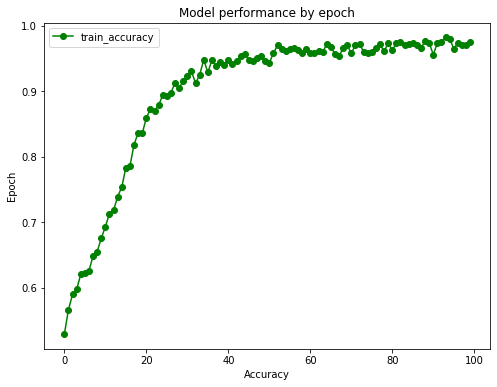

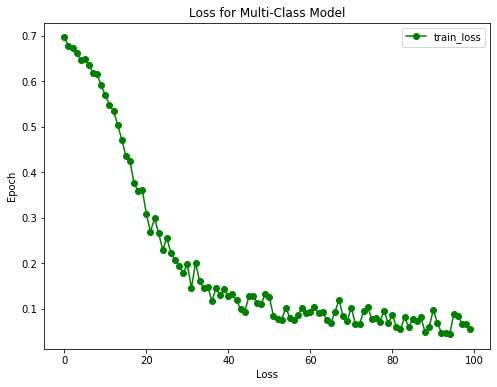

In [65]:
plt.figure(figsize=(8,6))
plt.title('Model performance by epoch')
plt.plot(history.history['accuracy'],'go-')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.show()
plt.figure(figsize=(8,6))
plt.title('Loss for Multi-Class Model')
plt.plot(history.history['loss'],'go-')
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.show()

In [66]:
model.save('cough.h5')